In [1]:
%matplotlib inline

## Setup GPU Device

In [2]:
import random

In [3]:
import os
#Set GPU IDs for training:
os.environ["CUDA_VISIBLE_DEVICES"] = '3'

In [4]:
import dgl
def build_circuit_graph_undirected(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    g.add_edges(dst, src)
    return g

def build_circuit_graph_directed_sd(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(src, dst)
    return g

def build_circuit_graph_directed_ds(node_list,edge_list):
    g = dgl.DGLGraph()
    g.add_nodes(len(node_list))
    src, dst = tuple(zip(*edge_list))
    g.add_edges(dst, src)
    return g

## Choose Number of Training Samples

In [5]:
import os
import matplotlib.pyplot as plt
import networkx as nx
import csv
import numpy as np
dir = 'training_data'

trainset=[]
labels=[]
#for filename in os.listdir(dir):
np.random.seed(1)
sample_size = 20
# training_idx = np.random.randint(4,64,10)
training_idx_1 = np.random.choice(np.arange(4,64), size=sample_size, replace=False)
training_idx_2 = np.random.choice(np.arange(4,64), size=sample_size, replace=False)
training_idx_3 = np.random.choice(np.arange(4,64), size=sample_size, replace=False)
training_idx_4 = np.random.choice(np.arange(4,64), size=sample_size, replace=False)
# training_idx_1 = [6]
# training_idx_2 = [6]
# training_idx_3 = [6]
# training_idx_4 = [6]
print(training_idx_1,training_idx_2,training_idx_3,training_idx_4)

[43 45  6 52 54 48 37 39 44 31 28 57 50  7 30 40 25 14 56 23] [32 47 59 16 25 46 34 50 39 41 28 15  6 63  9 56 10 24 33 60] [33 45 18 29  7 23 47 15 44 13 12 31  4 25 61 42 46 57 55 30] [61 53 59 34 52 21 16 46 37 42 57 55 30  8 29 51 35 45 12 14]


## Prepare Training and Test Data

In [6]:
for idx in range(len(training_idx_1)):
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    node_list3=[]
    edge_list3=[]
    label_list3=[]
    node_list4=[]
    edge_list4=[]
    label_list4=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(training_idx_1[idx])+"bit"+j+'.csv'
        filename2 = "cla_"+str(training_idx_2[idx])+"bit"+j+'.csv'
        filename3 = "csa_"+str(training_idx_3[idx])+"bit"+j+'.csv'
        filename4 = "CSkipA_"+str(training_idx_4[idx])+"bit"+j+'.csv'
        if(filename.find("node_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
        
        if(filename3.find("node_list")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                node_list3 = list(reader)
                
        if(filename3.find("edge_list")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list3 = list(reader)
        if(filename3.find("graph_label")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                label_list3 = list(reader)
        if(filename3.find("gate_type")>=0):
            with open(dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type3 = list(reader)
        if(filename4.find("node_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                node_list4 = list(reader)
                
        if(filename4.find("edge_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list4 = list(reader)
        if(filename4.find("graph_label")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                label_list4 = list(reader)
        if(filename4.find("gate_type")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type4 = list(reader)
    #create dgl graph
    g=build_circuit_graph_undirected(node_list,edge_list)
    trainset.append(g)
    labels.append(label_list[0])
    g2=build_circuit_graph_undirected(node_list2,edge_list2)
    trainset.append(g2)
    labels.append(label_list2[0])
    g3=build_circuit_graph_undirected(node_list3,edge_list3)
    trainset.append(g3)
    labels.append(label_list3[0])
    g4=build_circuit_graph_undirected(node_list4,edge_list4)
    trainset.append(g4)
    labels.append(label_list4[0])

for i in labels:
    i[0] = int(i[0])

print(labels)

[[1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3], [1], [0], [2], [3]]


## Visualize Training Data

In [7]:
# graph = trainset[14]
# label=labels[14][0]

# fig, ax = plt.subplots()
# G=graph.to_networkx()
# pos=nx.spring_layout(G)
# nx.draw(G,pos)
# nx.draw_networkx_labels(G,pos, ax=ax)
# ax.set_title('Class: {:f}'.format(label))
# plt.show()

## Apply random shuffle to training set

In [8]:
##apply random shuffle on the trainset
np.random.seed(0)
randomize = np.arange(len(trainset))
np.random.shuffle(randomize)
labels_shuffled=[]
trainset_shuffled=[]
for i in range (len(randomize)):
    labels_shuffled.append(labels[randomize[i]])
    trainset_shuffled.append(trainset[randomize[i]])

In [9]:
len(trainset_shuffled)

80

In [10]:
import dgl

def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    return batched_graph, torch.tensor(labels)

In [11]:
import dgl.function as fn
import torch
import torch.nn as nn

# Sends a message of node feature h.
msg = fn.copy_src(src='h', out='m')

def reduce(nodes):
    """Take an average over all neighbor node features hu and use it to
    overwrite the original node feature."""
    accum = torch.mean(nodes.mailbox['m'], 1)
    return {'h': accum}

class NodeApplyModule(nn.Module):
    """Update the node feature hv with ReLU(Whv+b)."""
    def __init__(self, in_feats, out_feats, activation):
        super(NodeApplyModule, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)
        self.activation = activation

    def forward(self, node):
        h = self.linear(node.data['h'])
        h = self.activation(h)
        return {'h' : h}

class GCN(nn.Module):
    def __init__(self, in_feats, out_feats, activation):
        super(GCN, self).__init__()
        self.apply_mod = NodeApplyModule(in_feats, out_feats, activation)

    def forward(self, g, feature):
        # Initialize the node features with h.
        g.ndata['h'] = feature
        g.update_all(msg, reduce)
        g.apply_nodes(func=self.apply_mod)
        return g.ndata.pop('h')

## Readout and classification

In [12]:
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(Classifier, self).__init__()

        self.layers = nn.ModuleList([
            GCN(in_dim, hidden_dim, F.relu),
            GCN(hidden_dim, hidden_dim, F.relu)])
        self.classify = nn.Linear(hidden_dim, n_classes)

    def forward(self, g):
        # For undirected graphs, in_degree is the same as
        # out_degree.
        h = g.in_degrees().view(-1, 1).float().cuda()
        for conv in self.layers:
            h = conv(g, h)
        g.ndata['h'] = h
        hg = dgl.mean_nodes(g, 'h')
        return self.classify(hg)

## Setup and training

In [13]:
import torch.optim as optim
from torch.utils.data import DataLoader

## Make Training Deterministic

In [14]:
import torch
torch.manual_seed(0)
#CuDNN:
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Set Training Epoch

In [15]:
training_epoch = 200

In [16]:
# Create model
#model = Classifier(1, 256, trainset.num_classes)
model = Classifier(1, 256, 4)
model.cuda()
loss_func = nn.CrossEntropyLoss().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train()

labels_shuffled = torch.LongTensor(labels_shuffled).cuda()

epoch_losses = []

for epoch in range(training_epoch):
    model.train()
    epoch_loss = 0
    for iter, bg in enumerate(trainset_shuffled):
        prediction=torch.zeros(1,4,dtype=torch.float64).cuda()
        prediction[0] = model(bg)

        loss = loss_func(prediction, labels_shuffled[iter])
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.detach().item()
    epoch_loss /= (iter + 1)
    print('Epoch {}, loss {:.4f}'.format(epoch, epoch_loss))
    epoch_losses.append(epoch_loss)
    
#     if (epoch%5==0):
#         model.eval()
#         eval_bg = dgl.batch(trainset_shuffled)
#         eval_labels = torch.tensor(labels_shuffled).float().view(-1, 1)
#         probs_Y = torch.softmax(model(eval_bg), 1)
#         argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)

#         print('Accuracy of argmax predictions on the test set: {:4f}%'.format(
#             (eval_labels == argmax_Y.float()).sum().item() / len(eval_labels) * 100))

Epoch 0, loss 1.5685
Epoch 1, loss 1.4242
Epoch 2, loss 1.3875
Epoch 3, loss 1.3498
Epoch 4, loss 1.3076
Epoch 5, loss 1.2486
Epoch 6, loss 1.1757
Epoch 7, loss 1.0987
Epoch 8, loss 1.0330
Epoch 9, loss 0.9803
Epoch 10, loss 0.9378
Epoch 11, loss 0.9036
Epoch 12, loss 0.8739
Epoch 13, loss 0.8455
Epoch 14, loss 0.8185
Epoch 15, loss 0.7935
Epoch 16, loss 0.7767
Epoch 17, loss 0.7460
Epoch 18, loss 0.7187
Epoch 19, loss 0.6977
Epoch 20, loss 0.6795
Epoch 21, loss 0.6616
Epoch 22, loss 0.6504
Epoch 23, loss 0.6505
Epoch 24, loss 0.6302
Epoch 25, loss 0.6153
Epoch 26, loss 0.5986
Epoch 27, loss 0.5831
Epoch 28, loss 0.5767
Epoch 29, loss 0.5692
Epoch 30, loss 0.5626
Epoch 31, loss 0.5575
Epoch 32, loss 0.5522
Epoch 33, loss 0.5471
Epoch 34, loss 0.5441
Epoch 35, loss 0.5391
Epoch 36, loss 0.5348
Epoch 37, loss 0.5290
Epoch 38, loss 0.5224
Epoch 39, loss 0.5183
Epoch 40, loss 0.5133
Epoch 41, loss 0.5056
Epoch 42, loss 0.5010
Epoch 43, loss 0.5033
Epoch 44, loss 0.5010
Epoch 45, loss 0.490

## Finish Training

## Plot Loss

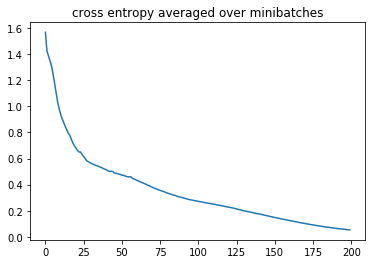

In [17]:
plt.title('cross entropy averaged over minibatches')
plt.plot(epoch_losses)
plt.show()

In [18]:
print(model.layers[0].apply_mod.linear.weight.size())
print(model.layers[1].apply_mod.linear.weight.size())
model.classify.weight.size()

torch.Size([256, 1])
torch.Size([256, 256])


torch.Size([4, 256])

## Get Testset data

In [19]:
testset = []
test_labels = []
test_dir = 'test_data'

testing_idx_1=[]
testing_idx_2=[]
testing_idx_3=[]
testing_idx_4=[]
for i in range(4,65):
    if i not in training_idx_1:
        testing_idx_1.append(i)
    if i not in training_idx_2:
        testing_idx_2.append(i)
    if i not in training_idx_3:
        testing_idx_3.append(i)
    if i not in training_idx_4:
        testing_idx_4.append(i)
        
# print(testing_idx_1)
# print(training_idx_1)
# print(testing_idx_2)
# print(training_idx_2)
# print(testing_idx_3)
# print(training_idx_3)
# print(testing_idx_4)
# print(training_idx_4)

## Random Sample Nodes and Edges for Testing

## Set Percentage Keep

In [20]:
pct_keep = 0.8

In [21]:
for idx in range(len(testing_idx_1)):
    node_list=[]
    edge_list=[]
    label_list=[]
    node_list2=[]
    edge_list2=[]
    label_list2=[]
    node_list3=[]
    edge_list3=[]
    label_list3=[]
    node_list4=[]
    edge_list4=[]
    label_list4=[]
    for j in ["node_list","edge_list","graph_label"]:
        filename = "rca_"+str(testing_idx_1[idx])+"bit"+j+'.csv'
        filename2 = "cla_"+str(testing_idx_2[idx])+"bit"+j+'.csv'
        filename3 = "csa_"+str(testing_idx_3[idx])+"bit"+j+'.csv'
        filename4 = "CSkipA_"+str(testing_idx_4[idx])+"bit"+j+'.csv'
        
        if(filename.find("node_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                node_list = list(reader)
                
        if(filename.find("edge_list")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list = list(reader)
        if(filename.find("graph_label")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                label_list = list(reader)
        if(filename.find("gate_type")>=0):
            with open(test_dir+'/'+filename, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type = list(reader)
        
        if(filename2.find("node_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                node_list2 = list(reader)
                
        if(filename2.find("edge_list")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list2 = list(reader)
        if(filename2.find("graph_label")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                label_list2 = list(reader)
        if(filename2.find("gate_type")>=0):
            with open(test_dir+'/'+filename2, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type2 = list(reader)
        if(filename3.find("node_list")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                node_list3 = list(reader)
                
        if(filename3.find("edge_list")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list3 = list(reader)
        if(filename3.find("graph_label")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                label_list3 = list(reader)
        if(filename3.find("gate_type")>=0):
            with open(test_dir+'/'+filename3, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type3 = list(reader)
        if(filename4.find("node_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                node_list4 = list(reader)
                
        if(filename4.find("edge_list")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                edge_list4 = list(reader)
        if(filename4.find("graph_label")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                label_list4 = list(reader)
        if(filename4.find("gate_type")>=0):
            with open(dir+'/'+filename4, 'rt') as fh:
                reader=csv.reader(fh)
                gate_type4 = list(reader)
    
    #randomly sample edges but keep all nodes
    
#     node_list_keep = random.sample(node_list,int(len(node_list)*pct_keep))
    node_list_keep = node_list
    edge_list_keep = random.sample(edge_list,int(len(edge_list)*pct_keep))
#     node_list2_keep = random.sample(node_list2,int(len(node_list2)*pct_keep))
    node_list2_keep = node_list2
    edge_list2_keep = random.sample(edge_list2,int(len(edge_list2)*pct_keep))
#     node_list3_keep = random.sample(node_list3,int(len(node_list3)*pct_keep))
    node_list3_keep = node_list3
    edge_list3_keep = random.sample(edge_list3,int(len(edge_list3)*pct_keep))
#     node_list4_keep = random.sample(node_list4,int(len(node_list4)*pct_keep))
    node_list4_keep = node_list4
    edge_list4_keep = random.sample(edge_list4,int(len(edge_list4)*pct_keep))
    
    #create dgl graph
    g=build_circuit_graph_undirected(node_list_keep,edge_list_keep)
    testset.append(g)
    test_labels.append(label_list[0])
    g2=build_circuit_graph_undirected(node_list2_keep,edge_list2_keep)
    testset.append(g2)
    test_labels.append(label_list2[0])
    g3=build_circuit_graph_undirected(node_list3_keep,edge_list3_keep)
    testset.append(g3)
    test_labels.append(label_list3[0])
    g4=build_circuit_graph_undirected(node_list4_keep,edge_list4_keep)
    testset.append(g4)
    test_labels.append(label_list4[0])

for i in test_labels:
    i[0] = int(i[0])

# print(test_labels)

In [22]:
##apply random shuffle on the testset    
np.random.seed(0)
randomize = np.arange(len(testset))
np.random.shuffle(randomize)
testset_shuffled=[]
test_labels_shuffled=[]
for i in range (len(randomize)):
    test_labels_shuffled.append(test_labels[randomize[i]])
    testset_shuffled.append(testset[randomize[i]])

## Test on Testset

In [23]:
model.eval()
test_bg = dgl.batch(testset_shuffled)
test_labels = torch.tensor(test_labels_shuffled).float().view(-1, 1).cuda()
probs_Y = torch.softmax(model(test_bg), 1)

sampled_Y = torch.multinomial(probs_Y, 1)
argmax_Y = torch.max(probs_Y, 1)[1].view(-1, 1)
print('Accuracy of sampled predictions on the test set: {:.4f}%'.format(
    (test_labels == sampled_Y.float()).sum().item() / len(test_labels) * 100))
print('Accuracy of argmax predictions on the test set: {:4f}%'.format(
    (test_labels == argmax_Y.float()).sum().item() / len(test_labels) * 100))

zip(model(test_bg),(test_labels))
for i1,i2 in zip(probs_Y,(test_labels)):
    print(i1,i2)
# print(torch.max(probs_Y, 1))

Accuracy of sampled predictions on the test set: 33.5366%
Accuracy of argmax predictions on the test set: 31.097561%
tensor([3.0329e-01, 0.0000e+00, 6.9671e-01, 2.9197e-08], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([2.], device='cuda:0')
tensor([9.9999e-01, 2.7989e-11, 1.3293e-05, 5.8112e-09], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([0.], device='cuda:0')
tensor([8.3914e-01, 0.0000e+00, 1.6086e-01, 2.2146e-08], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([2.], device='cuda:0')
tensor([9.9953e-01, 1.0008e-06, 4.6974e-04, 4.5399e-08], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([9.3591e-01, 0.0000e+00, 6.4090e-02, 1.1727e-07], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([2.], device='cuda:0')
tensor([9.9999e-01, 5.0760e-07, 5.0964e-06, 6.4421e-09], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([1.], device='cuda:0')
tensor([9.9990e-01, 3.5822e-06, 9.2535e-05, 7.0871e-08], devi

       grad_fn=<SelectBackward>) tensor([1.], device='cuda:0')
tensor([9.9994e-01, 6.4885e-08, 6.4207e-05, 2.3949e-07], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([3.], device='cuda:0')
tensor([9.9998e-01, 2.5916e-11, 2.3310e-05, 3.0114e-09], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([0.], device='cuda:0')
tensor([9.9992e-01, 2.5983e-11, 7.6806e-05, 2.3287e-09], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([0.], device='cuda:0')
tensor([9.9998e-01, 9.8745e-08, 1.9242e-05, 2.3572e-08], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([0.], device='cuda:0')
tensor([9.9999e-01, 7.8095e-07, 1.2440e-05, 1.1505e-08], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([1.], device='cuda:0')
tensor([9.8874e-01, 3.4079e-11, 1.1255e-02, 8.1134e-09], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([0.], device='cuda:0')
tensor([1.4922e-01, 0.0000e+00, 8.5078e-01, 1.0164e-08], device='cuda:0',
       grad_fn=<SelectBackward>) tensor([

In [24]:
(test_labels != argmax_Y.float()).nonzero()

tensor([[  2,   0],
        [  3,   0],
        [  4,   0],
        [  5,   0],
        [  6,   0],
        [  8,   0],
        [  9,   0],
        [ 11,   0],
        [ 12,   0],
        [ 13,   0],
        [ 14,   0],
        [ 17,   0],
        [ 20,   0],
        [ 21,   0],
        [ 23,   0],
        [ 24,   0],
        [ 25,   0],
        [ 26,   0],
        [ 27,   0],
        [ 29,   0],
        [ 30,   0],
        [ 32,   0],
        [ 33,   0],
        [ 34,   0],
        [ 36,   0],
        [ 37,   0],
        [ 38,   0],
        [ 39,   0],
        [ 40,   0],
        [ 42,   0],
        [ 43,   0],
        [ 44,   0],
        [ 46,   0],
        [ 47,   0],
        [ 48,   0],
        [ 50,   0],
        [ 51,   0],
        [ 52,   0],
        [ 54,   0],
        [ 55,   0],
        [ 56,   0],
        [ 57,   0],
        [ 58,   0],
        [ 61,   0],
        [ 62,   0],
        [ 63,   0],
        [ 64,   0],
        [ 66,   0],
        [ 67,   0],
        [ 68,   0],


## Finish Testing

In [21]:
probs_Y[79],test_labels[79]

(tensor([1.7754e-03, 8.2476e-01, 8.5223e-08, 1.7346e-01], device='cuda:0',
        grad_fn=<SelectBackward>), tensor([3.], device='cuda:0'))

In [31]:
import tsne

#m = trainset[0].adjacency_matrix()
m = model(test_bg).cpu().data.numpy()


In [32]:
Y = tsne.tsne(m, 2, 30)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 240...
Mean value of sigma: 1.391114
Iteration 10: error is 10.119028
Iteration 20: error is 8.529243
Iteration 30: error is 8.276184
Iteration 40: error is 8.183038
Iteration 50: error is 8.419083
Iteration 60: error is 8.450854
Iteration 70: error is 8.353728
Iteration 80: error is 8.481968
Iteration 90: error is 8.254655
Iteration 100: error is 8.599051
Iteration 110: error is 0.504397
Iteration 120: error is 0.311778
Iteration 130: error is 0.206596
Iteration 140: error is 0.164255
Iteration 150: error is 0.102685
Iteration 160: error is 0.112640
Iteration 170: error is 0.082629
Iteration 180: error is 0.077135
Iteration 190: error is 0.073787
Iteration 200: error is 0.071348
Iteration 210: error is 0.069433
Iteration 220: error is 0.067945
Iteration 230: error is 0.066670
Iteration 240: error is 0.065619
Iteration 250: error is 0.064777
Iteration 260: error is 0.064047
Iteration 2

In [50]:
print(Y)

[[-14.92519635 -13.8546473 ]
 [ -3.27599571 -18.10717051]
 [-11.82689442 -14.81885756]
 [ 23.24318042   1.27937166]
 [ -6.75274968  29.55790513]
 [  1.96276068 -20.27320768]
 [ -8.69168833  29.44632247]
 [-10.11632033  29.35663249]
 [ -8.54917864  29.8148468 ]
 [ 27.30432494   3.95487431]
 [ -5.30916309  29.53798808]
 [ 26.78053582   4.24398361]
 [ -2.64990215 -18.36215617]
 [-19.5605843  -13.11475469]
 [ 27.28781034   4.57302387]
 [ 25.65104463   3.16777284]
 [ -9.43555208  29.36456575]
 [ -2.01105254 -18.62164597]
 [-19.5627966  -13.1959791 ]
 [ -3.26490953  31.69367966]
 [-15.19906819 -13.67740172]
 [  0.79383111 -20.01973007]
 [-14.39944088 -14.59919045]
 [ 24.84743555   2.53594212]
 [-14.03578217 -12.38181153]
 [ 22.01470889   0.19295583]
 [  1.16158117 -20.25706378]
 [-14.84321784 -13.44177061]
 [ -3.23467804  31.49422051]
 [ 26.38578206   3.85138518]
 [ -3.90902382 -17.84889629]
 [ -3.9100634   30.02432872]
 [-14.57060525 -13.90720765]
 [-17.99893059 -13.44503072]
 [ -8.28533735

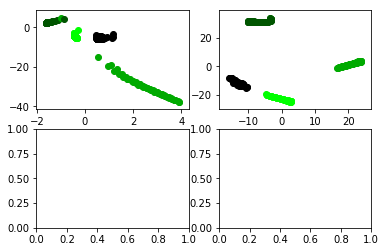

In [33]:
fig, axs = plt.subplots(2,2)

color = test_labels.cpu()*85/255
for i in range (len(test_labels)):
    axs[0,0].scatter(m[i,0],m[i,1],color=(0,color[i],0))
    axs[0,1].scatter(Y[i,0],Y[i,1],color=(0,color[i],0))
  
plt.show()

## End